In [1]:
import nibabel as nib
import matplotlib.pyplot as plt 
import numpy as np

from ipywidgets import interact, widgets

In [27]:
nii_file_path = "..\Full-Dataset\sub-01\\anat\sub-01_T1w.nii.gz"
nii_image = nib.load(nii_file_path)
image_data= nii_image.get_fdata()  

In [28]:
def update_image(slice_number):
    slice_array = image_data[:, :, slice_number]
    plt.imshow(slice_array, cmap="gray")
    plt.title("Healthy Control Anat MRI (SUB-01)")
    plt.colorbar()

    # Add the figure label to the bottom of the image
    plt.text(0.5, -0.15, "Figure 1.b", transform=plt.gca().transAxes,
             fontsize=12, ha='center')

    plt.show()



In [29]:
dimensions = image_data.shape
num_channels = dimensions[-1] if len(dimensions) > 3 else 1

In [30]:
slice_slider = widgets.IntSlider(
    min=1,
    max=dimensions[2] - 1,
    step=1,
    value=dimensions[2] - 1,
    description="Slice"
)

In [31]:
interact(update_image, slice_number=slice_slider)


interactive(children=(IntSlider(value=179, description='Slice', max=179, min=1), Output()), _dom_classes=('wid…

<function __main__.update_image(slice_number)>

In [32]:
nii_file_path = "..\Full-Dataset\sub-01\\func\sub-01_task-speech_bold.nii.gz"
nii_image = nib.load(nii_file_path)
image_data= nii_image.get_fdata()  
dimensions = image_data.shape
num_channels = dimensions[3] if len(dimensions) > 3 else 1
print(dimensions)

(96, 96, 32, 341)


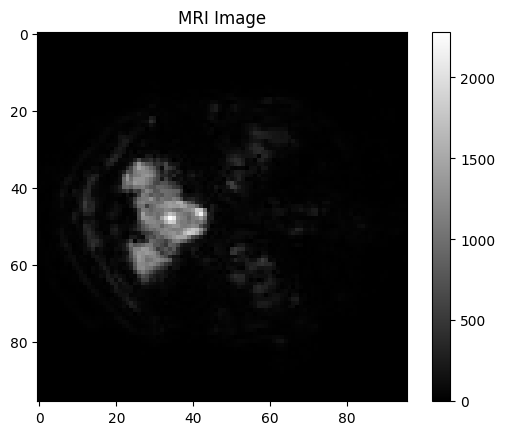

In [33]:
slice_array = image_data[:, :, 2,152]
plt.imshow(slice_array, cmap="gray")
plt.title("MRI Image")
plt.colorbar()
plt.show()

In [20]:
slice_slider = widgets.SelectionSlider(
    options=list(range(dimensions[2])),
    description="Slice",
    continous_update=True
)
channel_slider = widgets.SelectionSlider(
    options=list(range(num_channels)),
    description="Channel",
    continuous_update=True
)

In [21]:
def update_image_4D(channel_number,slice_number):
    #channel_number=3
    slice_array = image_data[:, :, slice_number,channel_number]
    plt.imshow(slice_array, cmap="gray")
    plt.title("Healthy Control fMRI (SUB-12)")
    plt.colorbar()
    plt.text(0.5, -0.15, "Figure 1.a", transform=plt.gca().transAxes,
             fontsize=12, ha='center')
    plt.show()

In [34]:
def mri_view(file_path,label):
    nii_file_path = file_path
    nii_image = nib.load(nii_file_path)
    image_data= nii_image.get_fdata()  
    dimensions = image_data.shape
    print(dimensions)
    num_channels = dimensions[3] if len(dimensions) > 3 else 1
    slice_slider = widgets.SelectionSlider(
        options=list(range(dimensions[2])),
        description="Slice",
        continous_update=True
    )
    channel_slider = widgets.SelectionSlider(
        options=list(range(num_channels)),
        description="Channel",
        continuous_update=True
    )
    def update_image_4D(channel_number,slice_number):
        #channel_number=3
        slice_array = image_data[:, :, slice_number,channel_number]
        plt.imshow(slice_array, cmap="gray")
        plt.title(label)
        plt.colorbar()
        plt.show()
    interact(update_image_4D,channel_number=channel_slider ,slice_number=slice_slider)

In [35]:
mri_view("C:\Reuben's Code's\PyTorch\Schizophrenia\Full-Dataset\sub-12\\func\sub-12_task-speech_bold.nii.gz","functional MRI Image")

(96, 96, 32, 341)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

In [37]:
mri_view(r"C:\Users\reub\Downloads\resampled_data.nii\resampled_data.nii","resampled fMRI Image Sub-03")

(91, 109, 91)


interactive(children=(SelectionSlider(description='Channel', options=(0,), value=0), SelectionSlider(descripti…

In [38]:
mri_view(r"C:\Users\reub\Downloads\motion_corrected_data.nii\motion_corrected_data.nii","motion corrected fMRI Image Sub-03")

(96, 96, 32, 336)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

In [40]:
mri_view(r"C:\Reuben's Code's\PyTorch\Schizophrenia\Full-Dataset\sub-03\\func\sub-03_task-speech_bold.nii.gz","uncorrected fMRI Image Sub-03")

(96, 96, 32, 341)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…